In [2]:
import numpy as np 
import pandas as pd
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

plt.style.use('seaborn')

%matplotlib inline

In [3]:
data_path = 'C:/Users/Jesse/Desktop/midterm_data/data/'

In [4]:
flights_df = pd.read_csv(data_path + 'flights.csv')

C:\Users\Jesse\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [7]:
# converting fl_date from object to datetime

flights_df['fl_date'] = pd.to_datetime(flights_df['fl_date'], format='%Y-%m-%d')

In [8]:
# Only 2018 and 2019 years
flights_df['fl_date'].dt.year.unique()

array([2019, 2018], dtype=int64)

In [9]:
# Create a year column from fl_date
flights_df['year'] = flights_df['fl_date'].dt.year

# Create a month column from fl_date
flights_df['month'] = flights_df['fl_date'].dt.month

In [10]:
# Drop all rows with NaN values in flights_df
# flights_delay has zero na in dep_delay or arr_delay

flights_delay = flights_df.dropna(subset = ['arr_delay', 'dep_delay'], axis=0)

#### dep_delay by year

In [11]:
# Get average dep_delay by year
avg_dep_delay_year_2018 = flights_delay.groupby('year')['dep_delay'].mean()[2018]
avg_dep_delay_year_2019 = flights_delay.groupby('year')['dep_delay'].mean()[2019]

median_dep_delay_year_2018 = flights_delay.groupby('year')['dep_delay'].median()[2018]
median_dep_delay_year_2019 = flights_delay.groupby('year')['dep_delay'].median()[2019]

In [52]:
print('2018 avg dep_delay: ', avg_dep_delay_year_2018, 'minutes')
print('2019 avg dep_delay: ', avg_dep_delay_year_2019, 'minutes')

print('2018 median dep_delay: ', median_dep_delay_year_2018, 'minutes')
print('2019 median dep_delay: ', median_dep_delay_year_2019, 'minutes')

2018 avg dep_delay:  10.01410262275718 minutes
2019 avg dep_delay:  10.926634251428272 minutes
2018 median dep_delay:  -2.0 minutes
2019 median dep_delay:  -2.0 minutes


#### arr_delay by year

In [53]:
# Get average dep_delay by year
avg_arr_delay_year_2018 = flights_delay.groupby('year')['arr_delay'].mean()[2018]
avg_arr_delay_year_2019 = flights_delay.groupby('year')['arr_delay'].mean()[2019]

median_arr_delay_year_2018 = flights_delay.groupby('year')['arr_delay'].median()[2018]
median_arr_delay_year_2019 = flights_delay.groupby('year')['arr_delay'].median()[2019]

In [54]:
print('2018 avg arr_delay: ', avg_arr_delay_year_2018, 'minutes')
print('2019 avg arr_delay: ', avg_arr_delay_year_2019, 'minutes')

print('2018 median arr_delay: ', median_arr_delay_year_2018, 'minutes')
print('2019 median darr_delay: ', median_arr_delay_year_2019, 'minutes')

2018 avg arr_delay:  5.278185099653127 minutes
2019 avg arr_delay:  5.674681430352708 minutes
2018 median arr_delay:  -6.0 minutes
2019 median darr_delay:  -6.0 minutes


### Monthly dep_delay (2019, 2018)

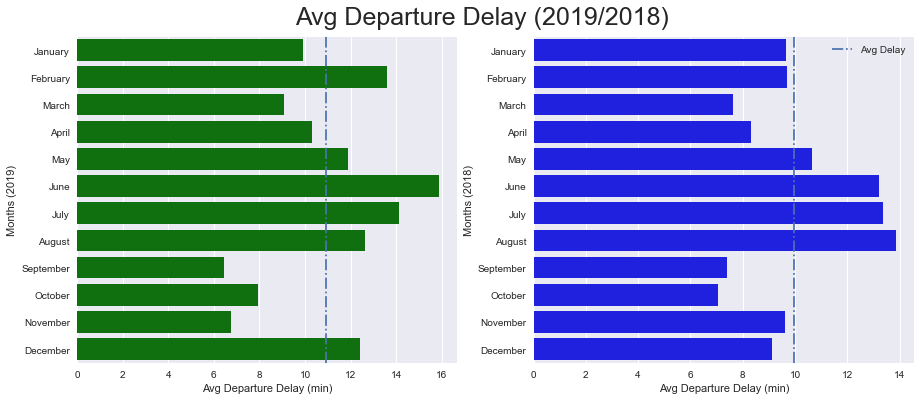

In [31]:
f, axes = plt.subplots(1, 2, figsize=(15,6))

dep_delay_months_2019 = flights_delay.loc[flights_delay['year'] == 2019].groupby('month')['dep_delay'].mean()

dep_delay_months_2018 = flights_delay.loc[flights_delay['year'] == 2018].groupby('month')['dep_delay'].mean()


sns.barplot(x=dep_delay_months_2019.values, 
                 y=[calendar.month_name[i] for i in dep_delay_months_2019.index], ax=axes[0], color='green')

sns.barplot(x=dep_delay_months_2018.values, 
                 y=[calendar.month_name[i] for i in dep_delay_months_2018.index], ax=axes[1], color='blue')

axes[0].axvline(dep_delay_months_2019.mean(), ls='-.', label='Avg Delay')
axes[1].axvline(dep_delay_months_2018.mean(), ls='-.', label='Avg Delay')


axes[0].set(xlabel='Avg Departure Delay (min)', ylabel='Months (2019)')
axes[1].set(xlabel='Avg Departure Delay (min)', ylabel='Months (2018)')

plt.legend()

plt.suptitle('Avg Departure Delay (2019/2018)', fontsize=25,y=0.95);

In [84]:
# Top 5 months in 2019 with highest avg delay
for i in dep_delay_months_2019.sort_values(ascending=False).index[:5]:
    print(calendar.month_name[i], dep_delay_months_2019[i])

June 15.889184135274377
July 14.12385362364159
February 13.606367498360953
August 12.62348202339947
December 12.392222473838526


In [85]:
# Top 5 months in 2018 with highest avg delay
for i in dep_delay_months_2018.sort_values(ascending=False).index[:5]:
    print(calendar.month_name[i], dep_delay_months_2018[i])

August 13.854183724792962
July 13.363864316245547
June 13.19461983530598
May 10.63188005493898
February 9.701150546021841


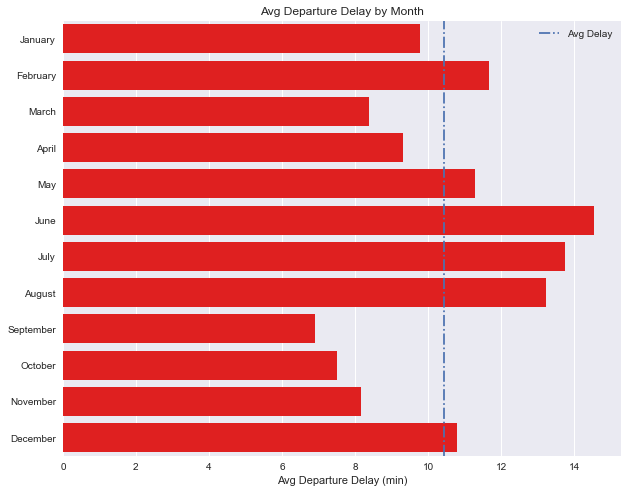

In [28]:
fig, ax2 = plt.subplots(figsize=(10,8))

dep_delay_months_overall = flights_delay.groupby('month')['dep_delay'].mean()
ax2 = sns.barplot(x=dep_delay_months_overall.values, 
                 y=[calendar.month_name[i] for i in dep_delay_months_overall.index], color='red')

ax2.axvline(dep_delay_months_overall.mean(), ls='-.', label='Avg Delay')
ax2.legend()

ax2.set(title='Avg Departure Delay by Month', xlabel='Avg Departure Delay (min)'); 

In [88]:
# Top 5 months overall with highest avg delay
for i in dep_delay_months_overall.sort_values(ascending=False).index[:5]:
    print(calendar.month_name[i], dep_delay_months_overall[i])

June 14.552507979325211
July 13.747809107217954
August 13.230558464525473
February 11.66950193032559
May 11.274070088918778


### Monthly arr_delay

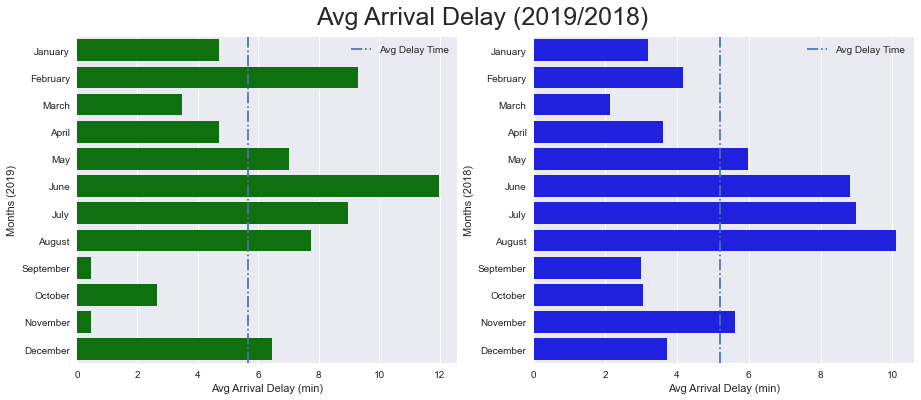

In [35]:
f, axes = plt.subplots(1, 2, figsize=(15,6))

arr_delay_months_2019 = flights_delay.loc[flights_delay['year'] == 2019].groupby('month')['arr_delay'].mean()
arr_delay_months_2018 = flights_delay.loc[flights_delay['year'] == 2018].groupby('month')['arr_delay'].mean()

ax = sns.barplot(x=arr_delay_months_2019.values, 
                 y=[calendar.month_name[i] for i in arr_delay_months_2019.index], ax=axes[0], color='green')


ax = sns.barplot(x=arr_delay_months_2018.values, 
                 y=[calendar.month_name[i] for i in arr_delay_months_2018.index], ax=axes[1], color='blue')


axes[0].axvline(arr_delay_months_2019.mean(), ls='-.', label='Avg Delay Time')
axes[1].axvline(arr_delay_months_2018.mean(), ls='-.', label='Avg Delay Time')

axes[0].legend()
axes[1].legend()

axes[0].set(xlabel='Avg Arrival Delay (min)', ylabel='Months (2019)')
axes[1].set(xlabel='Avg Arrival Delay (min)', ylabel='Months (2018)')

plt.suptitle('Avg Arrival Delay (2019/2018)', fontsize=25,y=0.95);

In [90]:
# Top 5 months in 2019 with highest avg delay
for i in arr_delay_months_2019.sort_values(ascending=False).index[:5]:
    print(calendar.month_name[i], arr_delay_months_2019[i])

June 11.993983965117929
February 9.30654890401491
July 8.971920115255177
August 7.745284522758974
May 7.0314678042455645


In [96]:
# Top 5 months in 2018 with highest avg delay
for i in arr_delay_months_2018.sort_values(ascending=False).index[:5]:
    print(calendar.month_name[i], arr_delay_months_2018[i])

August 10.095707785523791
July 8.995110416533032
June 8.827516925551581
May 5.989071261673398
November 5.603914216180432


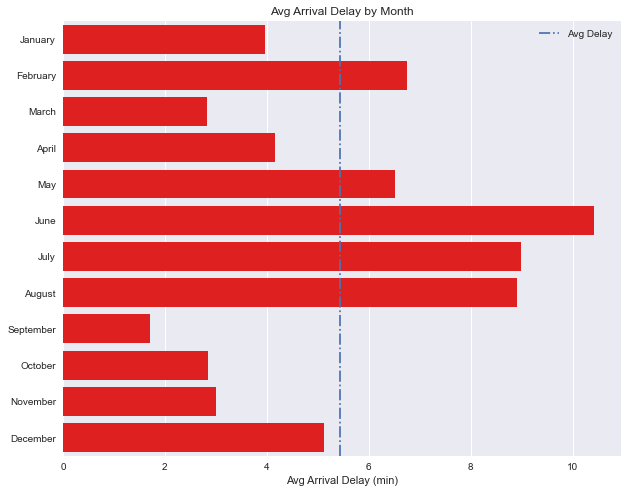

In [33]:
fig, ax2 = plt.subplots(figsize=(10,8))

arr_delay_months_overall = flights_delay.groupby('month')['arr_delay'].mean()

ax2 = sns.barplot(x=arr_delay_months_overall.values, 
                 y=[calendar.month_name[i] for i in arr_delay_months_overall.index], color='red')

ax2.axvline(arr_delay_months_overall.mean(), ls='-.', label='Avg Delay')
ax2.legend()

ax2.set(title='Avg Arrival Delay by Month', xlabel='Avg Arrival Delay (min)'); 

In [36]:
# Top 5 months in overall with highest avg delay
for i in arr_delay_months_overall.sort_values(ascending=False).index[:5]:
    print(calendar.month_name[i], arr_delay_months_overall[i])

June 10.42321388164398
July 8.983394731470014
August 8.90469349073505
February 6.750476200710875
May 6.517109018904581


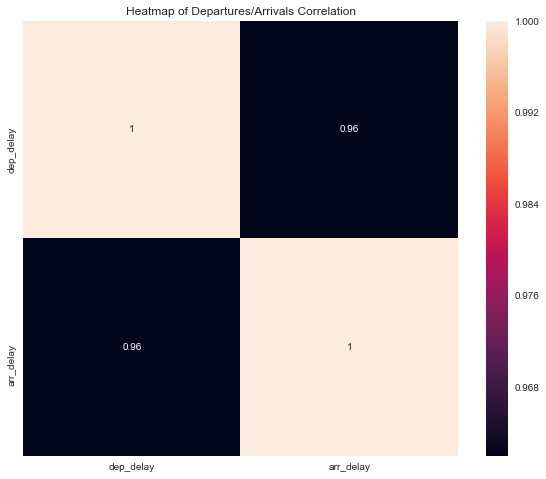

In [39]:
fig, ax2 = plt.subplots(figsize=(10,8))
ax = sns.heatmap(flights_delay[['dep_delay', 'arr_delay']].corr(), annot=True, square=True);

ax.set(title='Heatmap of Departures/Arrivals Correlation');

# We can see using pearsons correlation there is a 96% correlation in departures delays and arrival delays

In [42]:
passengers_df = pd.read_csv(data_path + 'passengers.csv')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

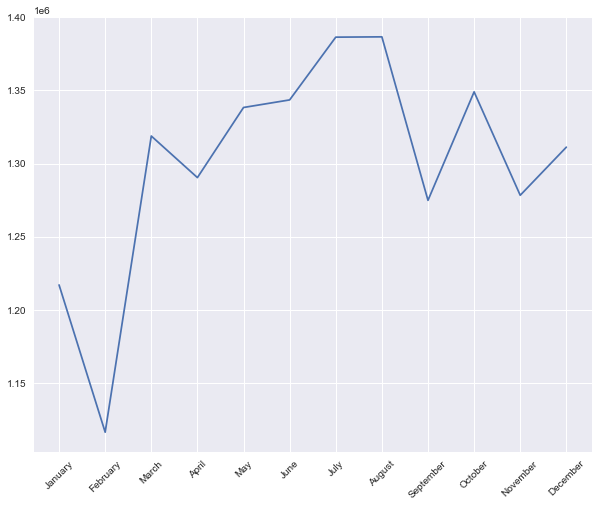

In [44]:
fig, ax2 = plt.subplots(figsize=(10,8))
month_flights = flights_delay.groupby('month')['fl_date'].count()

plt.plot([calendar.month_name[i] for i in month_flights.index], month_flights.values)
plt.xticks(rotation=45)

ValueError: operands could not be broadcast together with shapes (12,) (0,) 

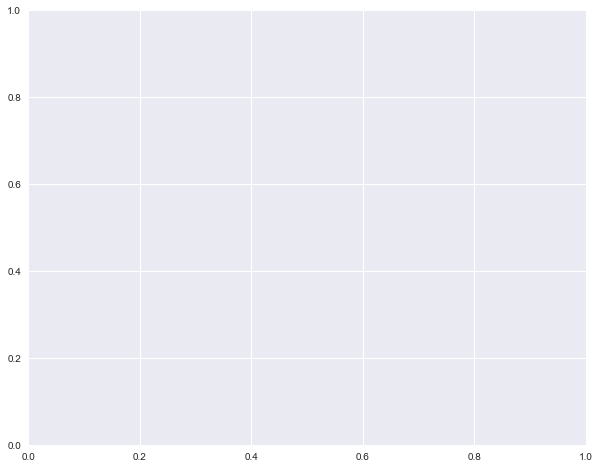

In [45]:
fig, ax2 = plt.subplots(figsize=(10,8))
passanger_counts_month=passengers_df.groupby('month')['passengers'].sum()/()
plt.plot([calendar.month_name[i] for i in passanger_counts_month.index], passanger_counts_month)
plt.xticks(rotation=45)

In [120]:
# correlate num passangers per month, lower in Febuary but this is due to Feb only having 28 days

We generally see higher delay times in June, July, August, Febuary, December and May

This is due to a couple reasons
1. Summer vacation more people travel, More planes in the sky
2. December High due to Christmas Holidays
3. Febuary also has presidents day which in 2018 and 2019 lands on monday, therefore possible 3 day weekend? Another holidays

In [138]:
flights_delay[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].notna().any()

carrier_delay          True
weather_delay          True
nas_delay              True
security_delay         True
late_aircraft_delay    True
dtype: bool

In [44]:
x = flights_delay.groupby('month')[['carrier_delay', 
                                    'weather_delay', 
                                    'nas_delay', 
                                    'security_delay', 
                                    'late_aircraft_delay']].sum()

fraction_delay = x.div(x['total'], axis=0)
fraction_delay

,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,total
month,,,,,,
1,0.306852,0.066710,0.238932,0.001228,0.386278,1.0
2,0.296061,0.064373,0.239479,0.001627,0.398459,1.0
3,0.344702,0.040669,0.209000,0.001538,0.404092,1.0
4,0.308764,0.048462,0.237158,0.001065,0.404552,1.0
5,0.285628,0.061169,0.245793,0.001002,0.406408,1.0
6,0.286346,0.056264,0.235836,0.001529,0.420025,1.0
7,0.286176,0.064406,0.237287,0.001047,0.411084,1.0
8,0.283000,0.054390,0.259332,0.001075,0.402203,1.0
9,0.303538,0.051267,0.269475,0.001999,0.373721,1.0
